In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import os

In [3]:
FILES_LOCATION = './boletins/'
files = os.listdir(FILES_LOCATION)
soma_votos_partido = []
for file in files:
    f = pd.read_csv(FILES_LOCATION + file, encoding='ISO-8859-1', delimiter=';')
    soma_votos_partido.append(f.query('DS_CARGO_PERGUNTA == "Presidente"').groupby(['SG_PARTIDO']).apply(lambda x: x['QT_COMPARECIMENTO'].sum()))
soma_votos_partido

[SG_PARTIDO
 #NULO#    3750855
 DC         280852
 MDB       1799667
 NOVO      1502733
 PATRI     1606847
 PDT       1954550
 PODE      1260512
 PPL         77747
 PSDB      1862971
 PSL       1946157
 PSOL      1449274
 PSTU       228419
 PT        1958878
 REDE      1744522
 dtype: int64, SG_PARTIDO
 #NULO#    8452711
 DC         334954
 MDB       4321267
 NOVO      2593895
 PATRI     3474191
 PDT       4367015
 PODE      2131564
 PPL        265275
 PSDB      4377712
 PSL       4392791
 PSOL      3055015
 PSTU       626333
 PT        4401798
 REDE      3485370
 dtype: int64, SG_PARTIDO
 #NULO#    1783649
 DC          58027
 MDB        840642
 NOVO       793321
 PATRI      693495
 PDT        912123
 PODE       752081
 PPL         32231
 PSDB       910021
 PSL        912985
 PSOL       619522
 PSTU        98410
 PT         913340
 REDE       664893
 dtype: int64, SG_PARTIDO
 #NULO#    1552421
 DC          51843
 MDB        616061
 NOVO       548113
 PATRI      601397
 PDT        82926

In [4]:
resultado = {}
for value in soma_votos_partido:
    for key in value.keys():
        if key in resultado:
            resultado[key] = value[key] + resultado[key]
        else:
            resultado[key] = value[key]
resultado

{'#NULO#': 17729353,
 'DC': 861340,
 'MDB': 8634119,
 'NOVO': 6239901,
 'PATRI': 7350345,
 'PDT': 9212873,
 'PODE': 5198277,
 'PPL': 474034,
 'PSDB': 9122409,
 'PSL': 9238078,
 'PSOL': 6392843,
 'PSTU': 1179316,
 'PT': 9263015,
 'REDE': 7630263}

In [5]:
soma_votos_partido = Series(resultado, index=resultado.keys())
soma_votos_partido

#NULO#    17729353
DC          861340
MDB        8634119
NOVO       6239901
PATRI      7350345
PDT        9212873
PODE       5198277
PPL         474034
PSDB       9122409
PSL        9238078
PSOL       6392843
PSTU       1179316
PT         9263015
REDE       7630263
dtype: int64

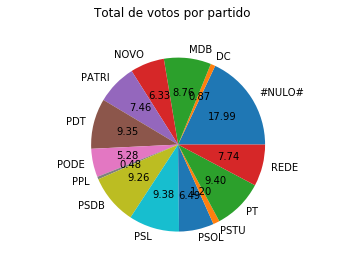

In [6]:
plt.axis('equal')
plt.pie(soma_votos_partido.values, autopct="%.2f",
        labels=soma_votos_partido.keys())
plt.suptitle("Total de votos por partido")
plt.show()